# Checklist
## KKPi distributions
#### with K* exclusion
1. ~~integrated~~
2. ~~binned in -t~~
#### without K* exclusion
1. ~~integrated~~
2. ~~binned in -t~~

## Kinematic distributions (with K* exclusion)
#### Kaon
1. ~~p~~
2. ~~theta~~
3. ~~p vs theta~~
4. ~~p vs kkpi~~
5. ~~theta vs kkpi~~
#### Pion
1. ~~p~~
2. ~~theta ~~
3. ~~p vs theta~~
4. ~~p vs kkpi~~
5. ~~theta vs kkpi~~
#### $K_{s}$
1. p
2. theta 
3. p vs theta
4. p vs kkpi
5. theta vs kkpi
#### $K_{s} \rightarrow \pi{+}$
1. p
2. theta 
3. p vs theta
4. p vs kkpi
5. theta vs kkpi
5. theta vs kkpi
#### $K_{s} \rightarrow \pi^{-}$
1. p
2. theta 
3. p vs theta
4. p vs kkpi
5. theta vs kkpi

### Particle mass combos
#### $p\pi$
1. whole mass range with shading for cut
2. $1.24 < M(KK\pi) < 1.35$ with shading for cut
3. $KK\pi$ vs $p\pi$ for $1.24 < M(KK\pi) < 1.35$
4. $KK\pi$ vs $p\pi$ for $1.1 < M(KK\pi) < 1.6$ 
5. $KK\pi$ with and without cut on quantity 

#### $pK^{\mp}$
1. whole mass range with shading for cut
2. $1.24 < M(KK\pi) < 1.35$ with shading for cut
3. $KK\pi$ vs $pK^{\mp}$ for $1.24 < M(KK\pi) < 1.35$
4. $KK\pi$ vs $pK^{\mp}$ for $1.1 < M(KK\pi) < 1.6$
5. $KK\pi$ with and without cut on quantity 

#### $pK_{s}$
1. whole mass range with shading for cut
2. $1.24 < M(KK\pi) < 1.35$ with shading for cut
3. $KK\pi$ vs $pK_{s}$ for $1.24 < M(KK\pi) < 1.35$
4. $KK\pi$ vs $pK_{s}$ for $1.1 < M(KK\pi) < 1.6$
5. $KK\pi$ with and without cut on quantity 

#### $K^{\mp}K_{s}$
1. whole mass range with shading for cut
2. $1.24 < M(KK\pi) < 1.35$ with shading for cut
3. $KK\pi$ vs $K^{\mp}K_{s}$ for $1.24 < M(KK\pi) < 1.35$
4. $KK\pi$ vs $K^{\mp}K_{s}$ for $1.1 < M(KK\pi) < 1.6$
5. $KK\pi$ with and without cut on quantity 

#### $K^{\mp}\pi^{\pm}$
1. whole mass range with shading for cut
2. $1.24 < M(KK\pi) < 1.35$ with shading for cut
3. $KK\pi$ vs $K^{\mp}\pi^{\pm}$ for $1.24 < M(KK\pi) < 1.35$
4. $KK\pi$ vs $K^{\mp}\pi^{\pm}$ for $1.1 < M(KK\pi) < 1.6$
5. $KK\pi$ with and without cut on quantity 

#### $K_{s}\pi^{\pm}$
1. whole mass range with shading for cut
2. $1.24 < M(KK\pi) < 1.35$ with shading for cut
3. $KK\pi$ vs $K_{s}\pi^{\pm}$ for $1.24 < M(KK\pi) < 1.35$
4. $KK\pi$ vs $K_{s}\pi^{\pm}$ for $1.1 < M(KK\pi) < 1.6$
5. $KK\pi$ with and without cut on quantity 




# Make Plots

In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as kcuts
import my_library.constants as constants

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
ROOT.gStyle.SetOptStat(0)

## DataFrame Creation

In [3]:
df_pipkmks = tools.get_dataframe('pipkmks', 'gluex1', 'data', filtered=False)
df_pimkpks = tools.get_dataframe('pimkpks', 'gluex1', 'data', filtered=False)

df_pipkmks = df_pipkmks.Filter(kcuts.KINFIT_CL_CUT).Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.P_P_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KINFIT_CL_CUT).Filter(kcuts.MX2_PPIMKPKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.P_P_CUT)

df_pipkmks_kstar_cut = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_pimkpks_kstar_cut = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)

df_pipkmks_all_cuts = df_pipkmks.Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT)
df_pimkpks_all_cuts = df_pimkpks.Filter(kcuts.PPIM_MASS_CUT).Filter(kcuts.KPP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT)

df_pipkmks_all_cuts_kstar_cut = df_pipkmks_all_cuts.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_pimkpks_all_cuts_kstar_cut = df_pimkpks_all_cuts.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)

## $KK\pi$ Plots 

#### Integrated E and t $KK\pi$ Plots with and without K* Rejection

In [4]:
n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max = 90, 1.1, 2.0
n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max = 40, 1.1, 1.5

hist_pipkmks = df_pipkmks_all_cuts.Histo1D(('pipkmks_no_cut', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max), 'pipkmks_m')
hist_pipkmks_kstar_cut = df_pipkmks_all_cuts_kstar_cut.Histo1D(('pipkmks_kstar_cut', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m')
hist_pimkpks = df_pimkpks_all_cuts.Histo1D(('pimkpks_no_cut', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max), 'pimkpks_m')
hist_pimkpks_kstar_cut = df_pimkpks_all_cuts_kstar_cut.Histo1D(('pimkpks_kstar_cut', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m')


#### Integrated E, binned in t $KK\pi$ plots with and without K* Rejection

In [5]:
pipkmks_hists = []
pimkpks_hists = []
pipkmks_kstar_cut_hists = []
pimkpks_kstar_cut_hists = []
for t in constants.ALLOWED_T_BINS:
    pipkmks_hists.append(df_pipkmks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_t_bin_{t}', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max), 'pipkmks_m'))
    pipkmks_kstar_cut_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pipkmks_kstar_cut_t_bin_{t}', 'M(#pi^{+}K^{-}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pipkmks_m'))
    pimkpks_hists.append(df_pimkpks_all_cuts.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_t_bin_{t}', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_no_cut, kkpi_no_cut_min, kkpi_no_cut_max), 'pimkpks_m'))
    pimkpks_kstar_cut_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pimkpks_kstar_cut_t_bin_{t}', 'M(#pi^{-}K^{+}K_{S})', n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pimkpks_m'))
    
    

## Particle Kinematics Plots 
**All Plots Will Have K\* Rejection Applied**

### Kaon Kinematics 

#### Integrated Distributions

In [19]:
n_bins_kaon_p, kaon_p_min, kaon_p_max = 50, 0, 8
n_bins_kaon_theta, kaon_theta_min, kaon_theta_max = 20, 0, 20

hist_km_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('km_p', 'p_{K^{-}}', n_bins_kaon_p, kaon_p_min, kaon_p_max), 'km_p')
hist_kp_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('kp_p', 'p_{K^{+}}', n_bins_kaon_p, kaon_p_min, kaon_p_max), 'kp_p')
hist_km_theta = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('km_theta', '#theta_{K^{-}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max), 'km_theta')
hist_kp_theta = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('kp_theta', '#theta_{K^{+}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max), 'kp_theta')
hist_km_theta_vs_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo2D(('km_theta_vs_p', '#theta_{K^{-}} vs p_{K^{-}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kaon_p, kaon_p_min, kaon_p_max), 'km_theta', 'km_p')
hist_kp_theta_vs_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo2D(('kp_theta_vs_p', '#theta_{K^{+}} vs p_{K^{+}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kaon_p, kaon_p_min, kaon_p_max), 'kp_theta', 'kp_p')
hist_km_p_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('km_p_vs_pipkmks', 'p_{K^{-}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kaon_p, kaon_p_min, kaon_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'km_p', 'pipkmks_m')
hist_kp_p_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('kp_p_vs_pimkpks', 'p_{K^{+}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kaon_p, kaon_p_min, kaon_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'kp_p', 'pimkpks_m')
hist_km_theta_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('km_theta_vs_pipkmks', '#theta_{K^{-}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'km_theta', 'pipkmks_m')
hist_kp_theta_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('kp_theta_vs_pimkpks', '#theta_{K^{+}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'kp_theta', 'pimkpks_m')

#### Binned Distributions

In [20]:
ks_pipkmks_p_hists = []
ks_pimkpks_p_hists = []
ks_pipkmks_theta_hists = []
ks_pimkpks_theta_hists = []
ks_pipkmks_theta_vs_p_hists = []
ks_pimkpks_theta_vs_p_hists = []
ks_pipkmks_p_vs_pipkmks_hists = []
ks_pimkpks_p_vs_pimkpks_hists = []
ks_pipkmks_theta_vs_pipkmks_hists = []
ks_pimkpks_theta_vs_pimkpks_hists = []

for t in constants.ALLOWED_T_BINS:
    ks_pipkmks_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'km_p_t{t}', 'p_{K^{-}}', n_bins_kaon_p, kaon_p_min, kaon_p_max), 'km_p'))
    ks_pimkpks_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'kp_p_t{t}', 'p_{K^{+}}', n_bins_kaon_p, kaon_p_min, kaon_p_max), 'kp_p'))
    ks_pipkmks_theta_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'km_theta_t{t}', '#theta_{K^{-}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max), 'km_theta'))
    ks_pimkpks_theta_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'kp_theta_t{t}', '#theta_{K^{+}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max), 'kp_theta'))
    ks_pipkmks_theta_vs_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'km_theta_vs_p_t{t}', '#theta_{K^{-}} vs p_{K^{-}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kaon_p, kaon_p_min, kaon_p_max), 'km_theta', 'km_p'))
    ks_pimkpks_theta_vs_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'kp_theta_vs_p_t{t}', '#theta_{K^{+}} vs p_{K^{+}}', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kaon_p, kaon_p_min, kaon_p_max), 'kp_theta', 'kp_p'))
    ks_pipkmks_p_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'km_p_vs_pipkmks_t{t}', 'p_{K^{-}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kaon_p, kaon_p_min, kaon_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'km_p', 'pipkmks_m'))
    ks_pimkpks_p_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'kp_p_vs_pimkpks_t{t}', 'p_{K^{+}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kaon_p, kaon_p_min, kaon_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'kp_p', 'pimkpks_m'))
    ks_pipkmks_theta_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'km_theta_vs_pipkmks_t{t}', '#theta_{K^{-}} vs M(#pi^{+}K^{-}K_{S})', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'km_theta', 'pipkmks_m'))
    ks_pimkpks_theta_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'kp_theta_vs_pimkpks_t{t}', '#theta_{K^{+}} vs M(#pi^{-}K^{+}K_{S})', n_bins_kaon_theta, kaon_theta_min, kaon_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'kp_theta', 'pimkpks_m'))

### Pion Kinematics 

#### Integrated Distributions

In [28]:
n_bins_pion_p, pion_p_min, pion_p_max = 50, 0, 8
n_bins_pion_theta, pion_theta_min, pion_theta_max = 20, 0, 20

hist_pip1_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('pip1_p', 'p_{#pi^{+}}', n_bins_pion_p,pion_p_min,pion_p_max), 'pip1_p')
hist_pim1_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('pim1_p', 'p_{#pi^{-}}', n_bins_pion_p,pion_p_min,pion_p_max), 'pim1_p')
hist_pip1_theta = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('pip1_theta', '#Theta_{#pi^{+}}', n_bins_pion_theta,pion_theta_min,pion_theta_max), 'pip1_theta')
hist_pim1_theta = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('pim1_theta', '#Theta_{#pi^{-}}', n_bins_pion_theta,pion_theta_min,pion_theta_max), 'pim1_theta')
hist_pip1_theta_vs_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo2D(('pip1_theta_vs_p', '#Theta_{#pi^{+}} vs p_{#pi^{+}}', n_bins_pion_theta,pion_theta_min,pion_theta_max, n_bins_pion_p,pion_p_min,pion_p_max), 'pip1_theta', 'pip1_p')
hist_pim1_theta_vs_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo2D(('pim1_theta_vs_p', '#Theta_{#pi^{-}} vs p_{#pi^{-}}', n_bins_pion_theta,pion_theta_min,pion_theta_max, n_bins_pion_p,pion_p_min,pion_p_max), 'pim1_theta', 'pim1_p')
hist_pip1_p_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('pip1_p_vs_pipkmks', 'p_{#pi^{+}} vs M(#pi^{+}K^{-}K_{S})', n_bins_pion_p,pion_p_min,pion_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip1_p', 'pipkmks_m')
hist_pim1_p_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('pim1_p_vs_pimkpks', 'p_{#pi^{-}} vs M(#pi^{-}K^{+}K_{S})', n_bins_pion_p,pion_p_min,pion_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim1_p', 'pimkpks_m')
hist_pip1_theta_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('pip1_theta_vs_pipkmks', '#Theta_{#pi^{+}} vs M(#pi^{+}K^{-}K_{S})', n_bins_pion_theta,pion_theta_min,pion_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip1_theta', 'pipkmks_m')
hist_pim1_theta_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('pim1_theta_vs_pimkpks', '#Theta_{#pi^{-}} vs M(#pi^{-}K^{+}K_{S})', n_bins_pion_theta,pion_theta_min,pion_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim1_theta', 'pimkpks_m')

#### Binned Distributions

In [33]:
pip1_p_hists = []
pim1_p_hists = []
pip1_theta_hists = []
pim1_theta_hists = []
pip1_theta_vs_p_hists = []
pim1_theta_vs_p_hists = []
pip1_p_vs_pipkmks_hists = []
pim1_p_vs_pimkpks_hists = []
pip1_theta_vs_pipkmks_hists = []
pim1_theta_vs_pimkpks_hists = []

for t in constants.ALLOWED_T_BINS:
    pip1_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'hist_pip1_p_vs_pipkmks_p_t{t}', 'p_{#pi^{+}}', n_bins_pion_p, pion_p_min, pion_p_max), 'pip1_p'))
    pim1_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'hist_pim1_p_p_t{t}', 'p_{#pi^{-}}', n_bins_pion_p, pion_p_min, pion_p_max), 'pim1_p'))
    pip1_theta_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'pip1_theta_t{t}', '#Theta_{#pi^{+}}', n_bins_pion_theta, pion_theta_min, pion_theta_max), 'pip1_theta'))
    pim1_theta_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'hist_pim1_p_theta_t{t}', '#Theta_{#pi^{-}}', n_bins_pion_theta, pion_theta_min, pion_theta_max), 'pim1_theta'))
    pip1_theta_vs_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pip1_theta_vs_p_t{t}', '#Theta_{#pi^{+}} vs p_{#pi^{+}}', n_bins_pion_theta, pion_theta_min, pion_theta_max, n_bins_pion_p, pion_p_min, pion_p_max), 'pip1_theta', 'pip1_p'))
    pim1_theta_vs_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pim1_p_theta_vs_p_t{t}', '#Theta_{#pi^{-}} vs p_{#pi^{-}}', n_bins_pion_theta, pion_theta_min, pion_theta_max, n_bins_pion_p, pion_p_min, pion_p_max), 'pim1_theta', 'pim1_p'))
    pip1_p_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pip1_p_vs_pipkmks_p_vs_pipkmks_t{t}', 'p_{#pi^{+}} vs M(#pi^{+}K^{-}K_{S})', n_bins_pion_p, pion_p_min, pion_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip1_p', 'pipkmks_m'))
    pim1_p_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pim1_p_p_vs_pimkpks_t{t}', 'p_{#pi^{-}} vs M(#pi^{-}K^{+}K_{S})', n_bins_pion_p, pion_p_min, pion_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim1_p', 'pimkpks_m'))
    pip1_theta_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pip1_theta_vs_pipkmks_t{t}', '#Theta_{#pi^{+}} vs M(#pi^{+}K^{-}K_{S})', n_bins_pion_theta, pion_theta_min, pion_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pip1_theta', 'pipkmks_m'))
    pim1_theta_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'hist_pim1_p_theta_vs_pimkpks_t{t}', '#Theta_{#pi^{-}} vs M(#pi^{-}K^{+}K_{S})', n_bins_pion_theta, pion_theta_min, pion_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'pim1_theta', 'pimkpks_m'))

### $K_{s}$ Kinematics 

#### Integrated Distributions

In [39]:
n_bins_ks_p, ks_p_min, ks_p_max = 50, 0, 8
n_bins_ks_theta, ks_theta_min, ks_theta_max = 20, 0, 20

hist_ks_pipkmks_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('ks_p', 'p_{K_{s}}', n_bins_ks_p, ks_p_min, ks_p_max), 'ks_p')
hist_ks_pimkpks_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('ks_p', 'p_{K_{s}}', n_bins_ks_p, ks_p_min, ks_p_max), 'ks_p')
hist_ks_pipkmks_theta = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo1D(('ks_theta', '#theta_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max), 'ks_theta')
hist_ks_pimkpks_theta = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo1D(('ks_theta', '#theta_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max), 'ks_theta')
hist_ks_pipkmks_theta_vs_p = df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Histo2D(('ks_theta_vs_p', '#theta_{K_{s}} vs p_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_ks_p, ks_p_min, ks_p_max), 'ks_theta', 'ks_p')
hist_ks_pimkpks_theta_vs_p = df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Histo2D(('ks_theta_vs_p', '#theta_{K_{s}} vs p_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_ks_p, ks_p_min, ks_p_max), 'ks_theta', 'ks_p')
hist_ks_pipkmks_p_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('ks_p_vs_pipkmks', 'p_{K_{s}} vs M(#pi^{+}K^{-}K_{S})', n_bins_ks_p, ks_p_min, ks_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_p', 'pipkmks_m')
hist_ks_pimkpks_p_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('ks_p_vs_pimkpks', 'p_{K_{s}} vs M(#pi^{-}K^{+}K_{S})', n_bins_ks_p, ks_p_min, ks_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_p', 'pimkpks_m')
hist_ks_pipkmks_theta_vs_pipkmks = df_pipkmks_all_cuts_kstar_cut.Histo2D(('ks_theta_vs_pipkmks', '#theta_{K_{s}} vs M(#pi^{+}K^{-}K_{S})', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_theta', 'pipkmks_m')
hist_ks_pimkpks_theta_vs_pimkpks = df_pimkpks_all_cuts_kstar_cut.Histo2D(('ks_theta_vs_pimkpks', '#theta_{K_{s}} vs M(#pi^{-}K^{+}K_{S})', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_theta', 'pimkpks_m')

#### Binned Distributions

In [40]:
ks_pipkmks_p_hists = []
ks_pimkpks_p_hists = []
ks_pipkmks_theta_hists = []
ks_pimkpks_theta_hists = []
ks_pipkmks_theta_vs_p_hists = []
ks_pimkpks_theta_vs_p_hists = []
ks_pipkmks_p_vs_pipkmks_hists = []
ks_pimkpks_p_vs_pimkpks_hists = []
ks_pipkmks_theta_vs_pipkmks_hists = []
ks_pimkpks_theta_vs_pimkpks_hists = []

for t in constants.ALLOWED_T_BINS:
    ks_pipkmks_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'ks_pipkmks_p_t{t}', 'p_{K_{s}}', n_bins_ks_p, ks_p_min, ks_p_max), 'ks_p'))
    ks_pimkpks_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'ks_pimkpks_p_t{t}', 'p_{K_{s}}', n_bins_ks_p, ks_p_min, ks_p_max), 'ks_p'))
    ks_pipkmks_theta_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'ks_pipkmks_theta_t{t}', '#theta_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max), 'ks_theta'))
    ks_pimkpks_theta_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f'ks_pimkpks_theta_t{t}', '#theta_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max), 'ks_theta'))
    ks_pipkmks_theta_vs_p_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'ks_pipkmks_theta_vs_p_t{t}', '#theta_{K_{s}} vs p_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_ks_p, ks_p_min, ks_p_max), 'ks_theta', 'ks_p'))
    ks_pimkpks_theta_vs_p_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS).Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'ks_pimkpks_theta_vs_p_t{t}', '#theta_{K_{s}} vs p_{K_{s}}', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_ks_p, ks_p_min, ks_p_max), 'ks_theta', 'ks_p'))
    ks_pipkmks_p_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'ks_pipkmks_p_vs_pipkmks_t{t}', 'p_{K_{s}} vs M(#pi^{+}K^{-}K_{S})', n_bins_ks_p, ks_p_min, ks_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_p', 'pipkmks_m'))
    ks_pimkpks_p_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'ks_pimkpks_p_vs_pimkpks_t{t}', 'p_{K_{s}} vs M(#pi^{-}K^{+}K_{S})', n_bins_ks_p, ks_p_min, ks_p_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_p', 'pimkpks_m'))
    ks_pipkmks_theta_vs_pipkmks_hists.append(df_pipkmks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'ks_pipkmks_theta_vs_pipkmks_t{t}', '#theta_{K_{s}} vs M(#pi^{+}K^{-}K_{S})', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_theta', 'pipkmks_m'))
    ks_pimkpks_theta_vs_pimkpks_hists.append(df_pimkpks_all_cuts_kstar_cut.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'ks_pimkpks_theta_vs_pimkpks_t{t}', '#theta_{K_{s}} vs M(#pi^{-}K^{+}K_{S})', n_bins_ks_theta, ks_theta_min, ks_theta_max, n_bins_kkpi_kstar_cut, kkpi_kstar_cut_min, kkpi_kstar_cut_max), 'ks_theta', 'pimkpks_m'))

# Draw Plots

In [21]:
c = ROOT.TCanvas('c', 'c', 1200, 800)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


### Integrated $KK\pi$ Plots with and without K* Rejection

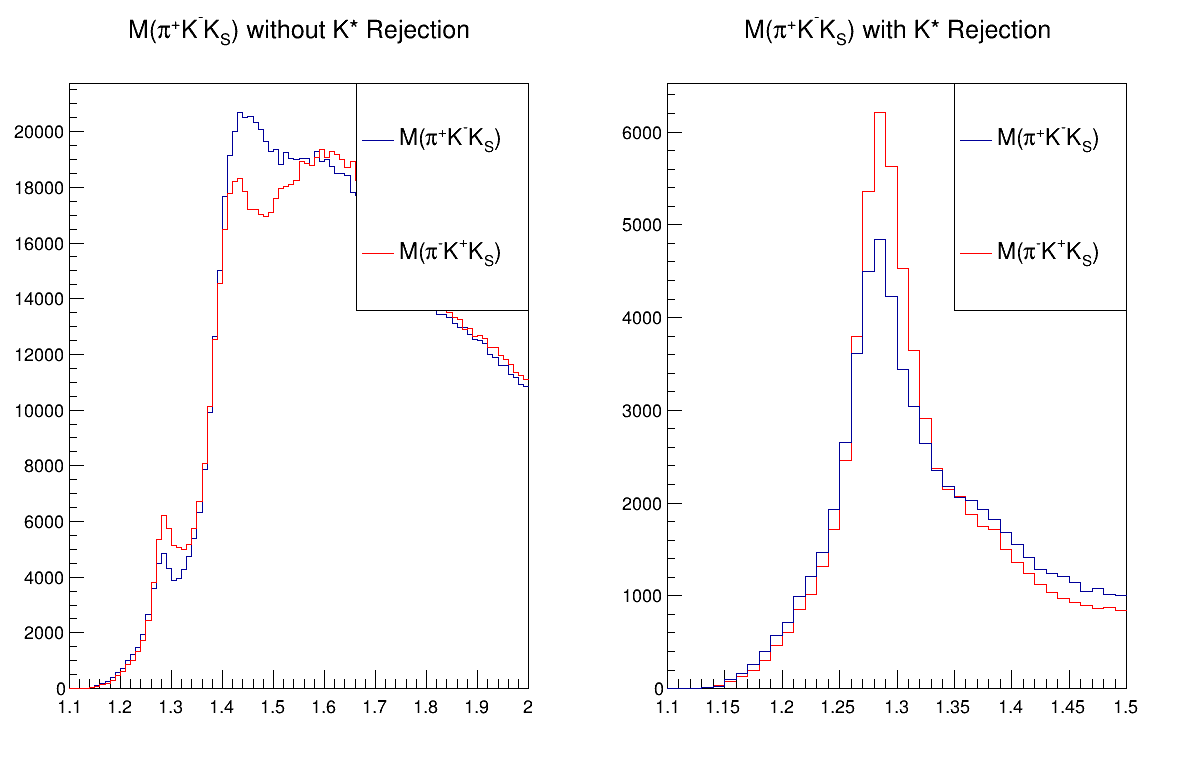

In [22]:
c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_pimkpks.SetLineColor(ROOT.kRed)
legend_kkpi = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_kkpi.AddEntry(hist_pipkmks.GetPtr(), 'M(#pi^{+}K^{-}K_{S})', 'l')
legend_kkpi.AddEntry(hist_pimkpks.GetPtr(), 'M(#pi^{-}K^{+}K_{S})', 'l')
sorted_hists = tools.sort_hists_by_max([hist_pipkmks, hist_pimkpks])
sorted_hists[0].SetTitle('M(#pi^{+}K^{-}K_{S}) without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_kkpi.Draw()

c.cd(2)
hist_pimkpks_kstar_cut.SetLineColor(ROOT.kRed)
legend_kkpi_kstar_cut = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_kkpi_kstar_cut.AddEntry(hist_pipkmks_kstar_cut.GetPtr(), 'M(#pi^{+}K^{-}K_{S})', 'l')
legend_kkpi_kstar_cut.AddEntry(hist_pimkpks_kstar_cut.GetPtr(), 'M(#pi^{-}K^{+}K_{S})', 'l')
sorted_hists = tools.sort_hists_by_max([hist_pipkmks_kstar_cut, hist_pimkpks_kstar_cut])
sorted_hists[0].SetTitle('M(#pi^{+}K^{-}K_{S}) with K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_kkpi_kstar_cut.Draw()

c.Draw()



### Kaon Kinematics 

#### Kaon Momentum and $\Theta$ Distributions
**$f_{1}(1285)$ region selected with $1.24 < M(KK\pi) < 1.35$**

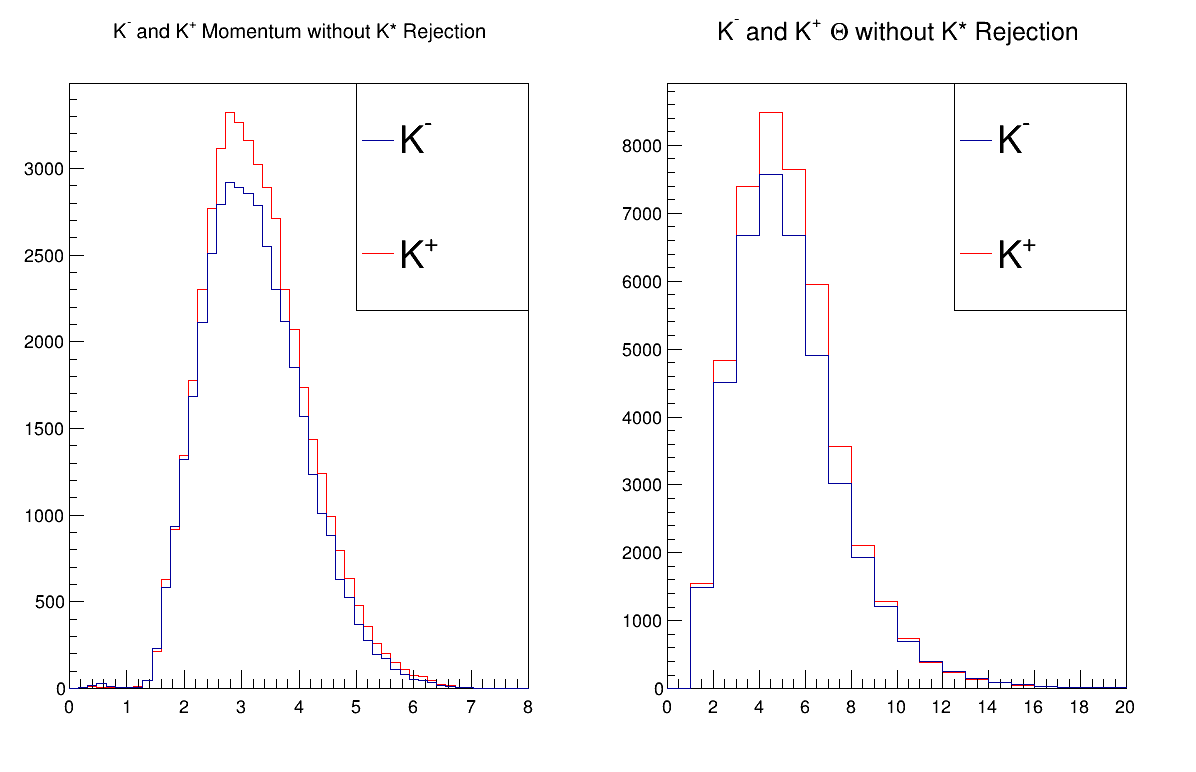

In [23]:
c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_kp_p.SetLineColor(ROOT.kRed)
legend_kaon_p = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_kaon_p.AddEntry(hist_km_p.GetPtr(), 'K^{-}', 'l')
legend_kaon_p.AddEntry(hist_kp_p.GetPtr(), 'K^{+}', 'l')
sorted_hists = tools.sort_hists_by_max([hist_km_p, hist_kp_p])
sorted_hists[0].SetTitle('K^{-} and K^{+} Momentum without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_kaon_p.Draw()

c.cd(2)
hist_kp_theta.SetLineColor(ROOT.kRed)
legend_kaon_theta = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_kaon_theta.AddEntry(hist_km_theta.GetPtr(), 'K^{-}', 'l')
legend_kaon_theta.AddEntry(hist_kp_theta.GetPtr(), 'K^{+}', 'l')
sorted_hists = tools.sort_hists_by_max([hist_km_theta, hist_kp_theta])
sorted_hists[0].SetTitle('K^{-} and K^{+} #Theta without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_kaon_theta.Draw()

c.Draw()


**Momentum in top row, $\Theta$ in bottom row**

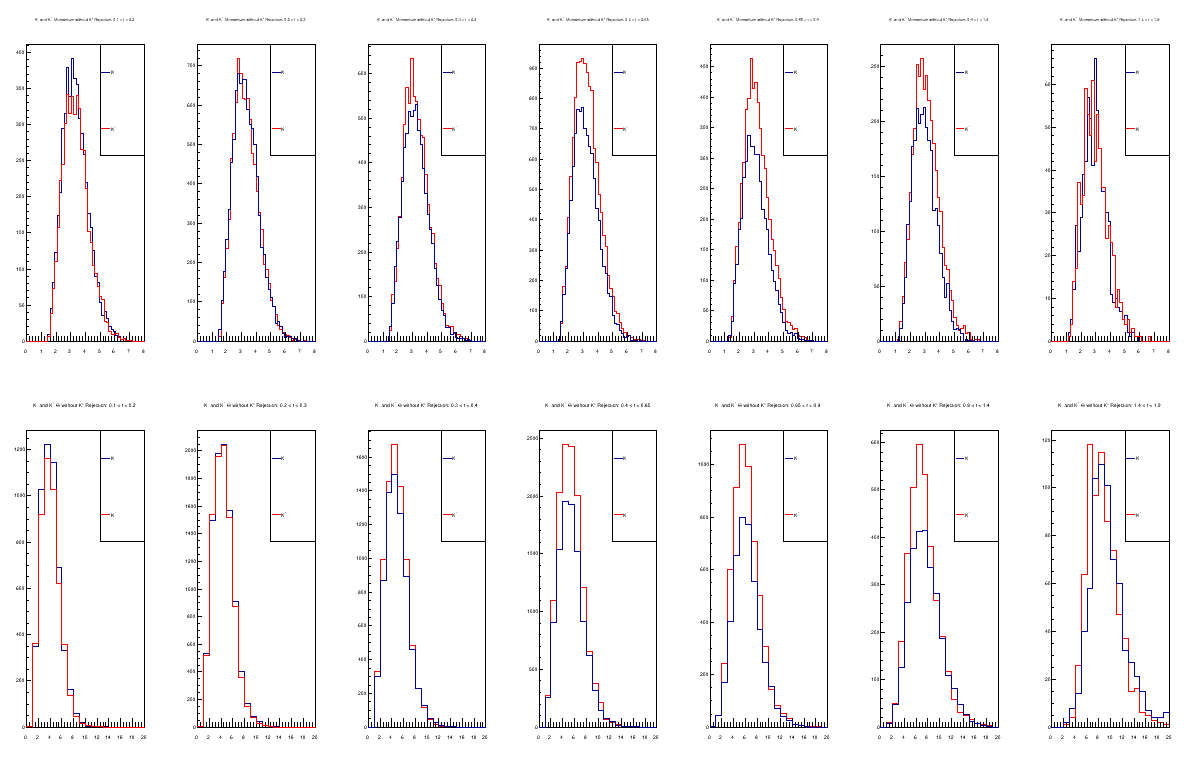

In [24]:
c.Clear()
c.Divide(7, 2)
legends = []
for i, (hist_km_p, hist_kp_p, hist_km_theta, hist_kp_theta) in enumerate(zip(ks_pipkmks_p_hists, ks_pimkpks_p_hists, ks_pipkmks_theta_hists, ks_pimkpks_theta_hists)):
    t_range_string = f'{constants.T_CUT_DICT[i+1][0]} < t < {constants.T_CUT_DICT[i+1][1]}'
    c.cd(i+1)
    hist_kp_p.SetLineColor(ROOT.kRed)
    legend_kaon_p = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
    legend_kaon_p.AddEntry(hist_km_p.GetPtr(), 'K^{-}', 'l')
    legend_kaon_p.AddEntry(hist_kp_p.GetPtr(), 'K^{+}', 'l')
    legends.append(legend_kaon_p)
    sorted_hists = tools.sort_hists_by_max([hist_km_p, hist_kp_p])
    sorted_hists[0].SetTitle('K^{-} and K^{+} Momentum without K* Rejection: ' + t_range_string)
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    legends[i].Draw()
    c.cd(i+8)
    hist_kp_theta.SetLineColor(ROOT.kRed)
    sorted_hists = tools.sort_hists_by_max([hist_km_theta, hist_kp_theta])
    sorted_hists[0].SetTitle('K^{-} and K^{+} #Theta without K* Rejection: ' + t_range_string)
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    legends[i].Draw()
c.Draw()
    

#### $\Theta$ vs Momentum Distributions
**$K^{-}$ in top row, $K^{+}$** in bottom row

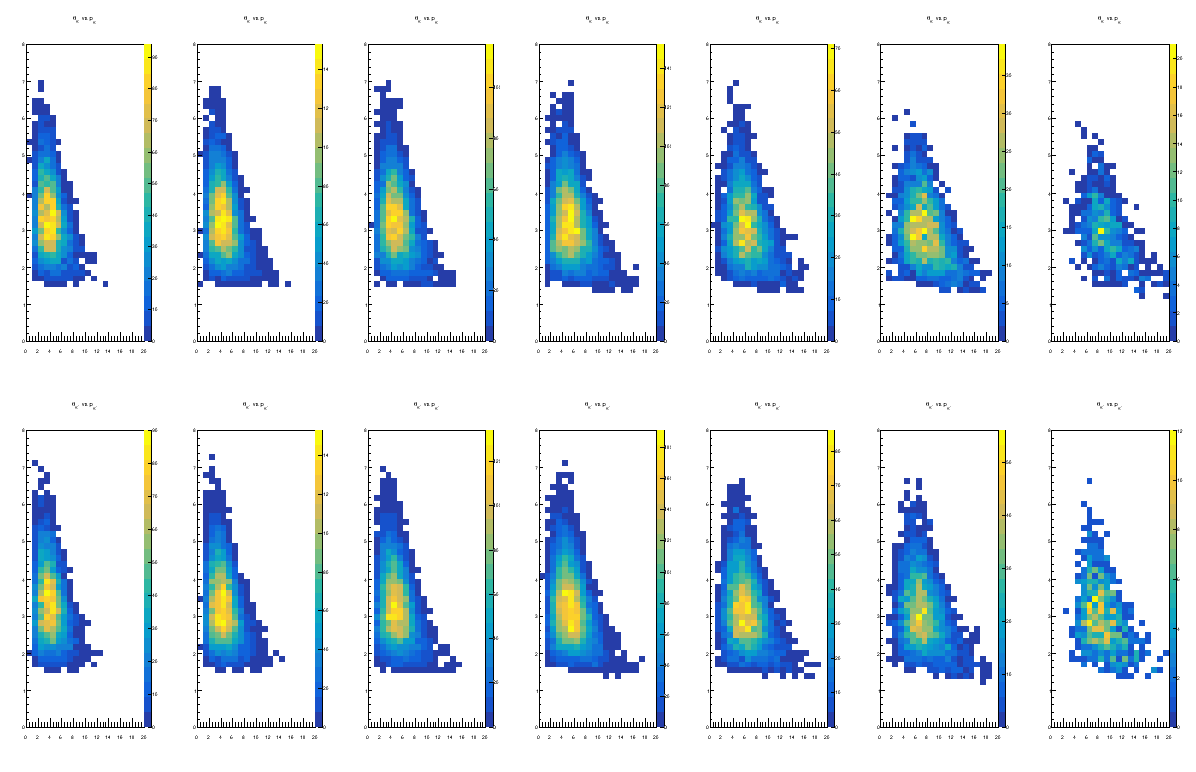

In [25]:
c.Clear()
c.Divide(7, 2)

for i, (hist_km, hist_kp) in enumerate(zip(ks_pipkmks_theta_vs_p_hists, ks_pimkpks_theta_vs_p_hists)):
    c.cd(i+1)
    hist_km.Draw('colz')
    c.cd(i+8)
    hist_kp.Draw('colz')
c.Draw()

#### Momentum vs $M(KK\pi)$ Distributions
**$K^{-}$ in top row, $K^{+}$** in bottom row

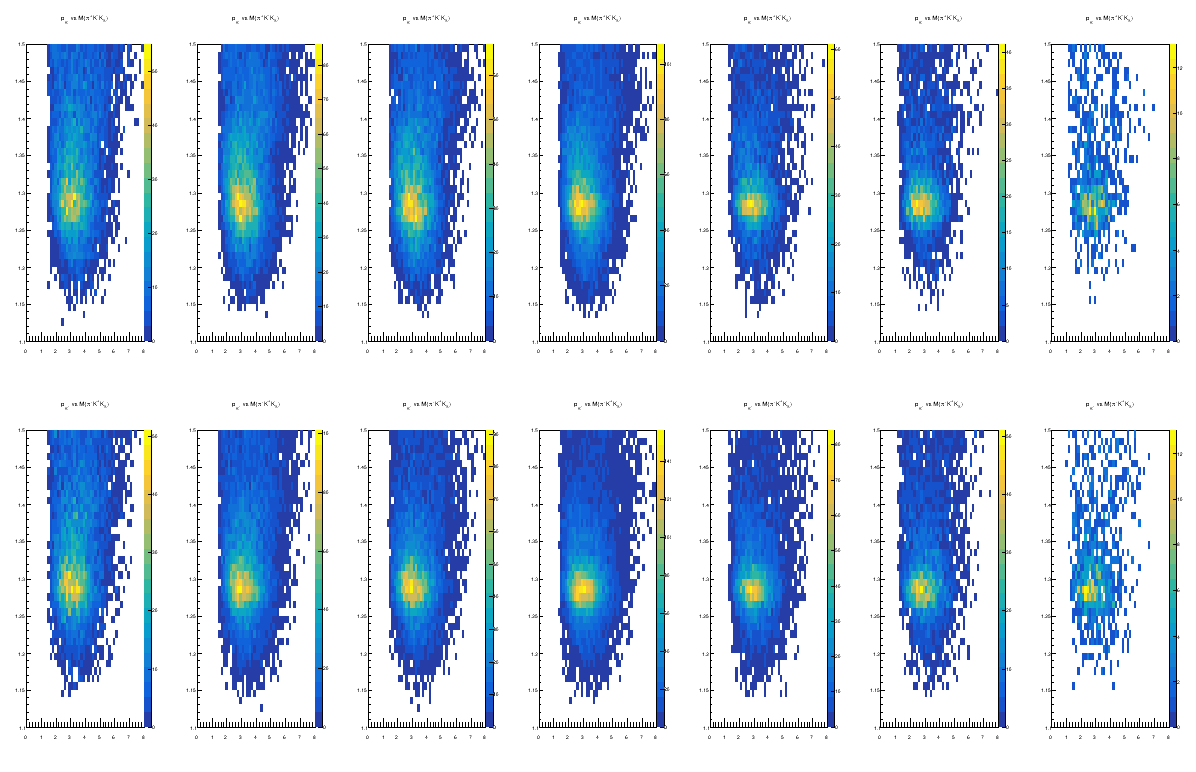

In [26]:
c.Clear()
c.Divide(7, 2)

for i, (hist_km, hist_kp) in enumerate(zip(ks_pipkmks_p_vs_pipkmks_hists, ks_pimkpks_p_vs_pimkpks_hists)):
    c.cd(i+1)
    hist_km.Draw('colz')
    c.cd(i+8)
    hist_kp.Draw('colz')
c.Draw()

#### $\Theta$ vs $M(KK\pi)$ Distributions
**$K^{-}$ in top row, $K^{+}$** in bottom row

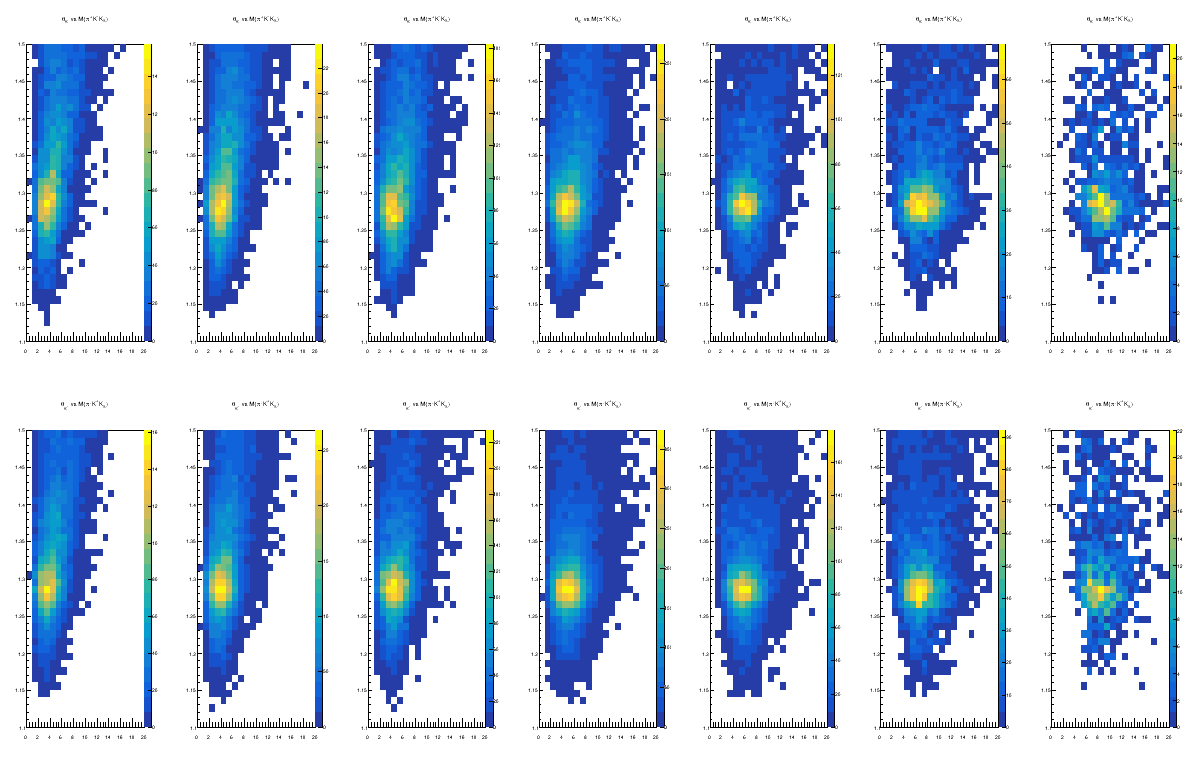

In [27]:
c.Clear()
c.Divide(7, 2)

for i, (hist_km, hist_kp) in enumerate(zip(ks_pipkmks_theta_vs_pipkmks_hists, ks_pimkpks_theta_vs_pimkpks_hists)):
    c.cd(i+1)
    hist_km.Draw('colz')
    c.cd(i+8)
    hist_kp.Draw('colz')
c.Draw()

### Pion Kinematics 

#### Pion Momentum and $\Theta$ Distributions
**$f_{1}(1285)$ region selected with $1.24 < M(KK\pi) < 1.35$**

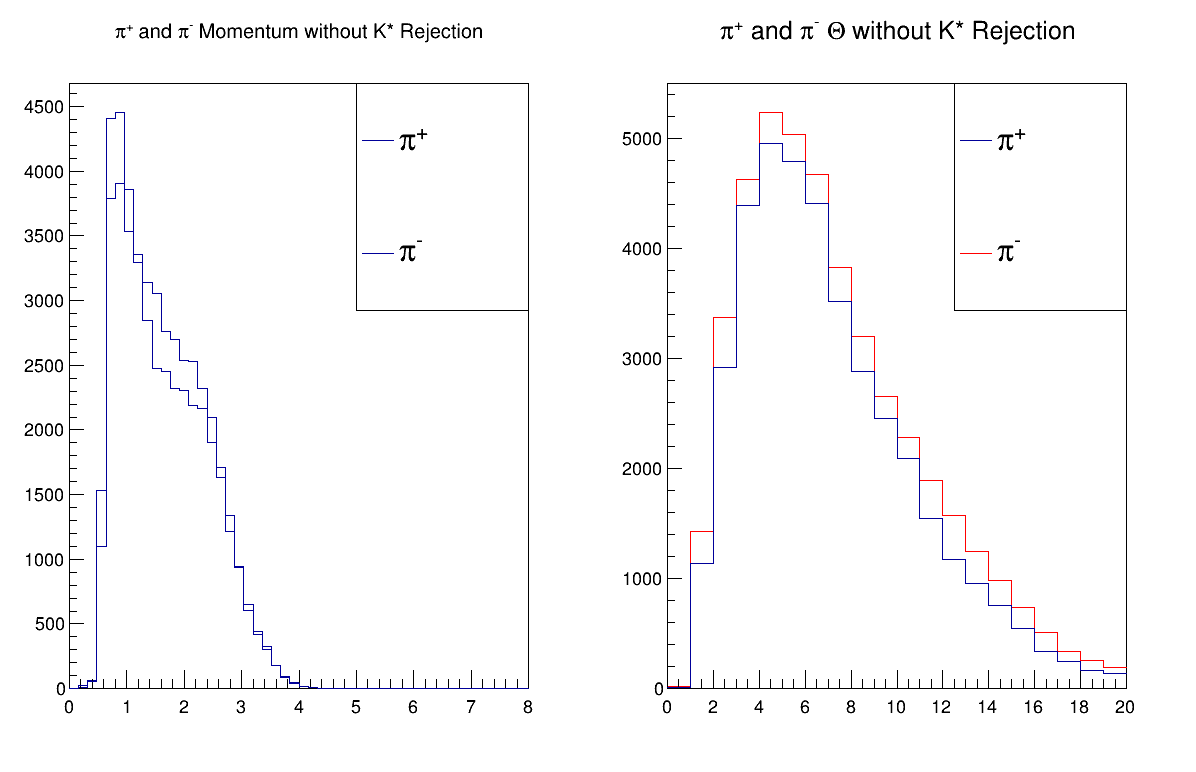

In [34]:
c.Clear()
c.Divide(2, 1)

c.cd(1)
hist_kp_p.SetLineColor(ROOT.kRed)
legend_pion_p = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_pion_p.AddEntry(hist_pip1_p.GetPtr(), '#pi^{+}', 'l')
legend_pion_p.AddEntry(hist_pim1_p.GetPtr(), '#pi^{-}', 'l')
sorted_hists = tools.sort_hists_by_max([hist_pip1_p, hist_pim1_p])
sorted_hists[0].SetTitle('#pi^{+} and #pi^{-} Momentum without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_pion_p.Draw()

c.cd(2)
hist_pim1_theta.SetLineColor(ROOT.kRed)
legend_pion_theta = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
legend_pion_theta.AddEntry(hist_pip1_theta.GetPtr(), '#pi^{+}', 'l')
legend_pion_theta.AddEntry(hist_pim1_theta.GetPtr(), '#pi^{-}', 'l')
sorted_hists = tools.sort_hists_by_max([hist_pip1_theta, hist_pim1_theta])
sorted_hists[0].SetTitle('#pi^{+} and #pi^{-} #Theta without K* Rejection')
sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
legend_pion_theta.Draw()

c.Draw()


**Momentum in top row, $\Theta$ in bottom row**

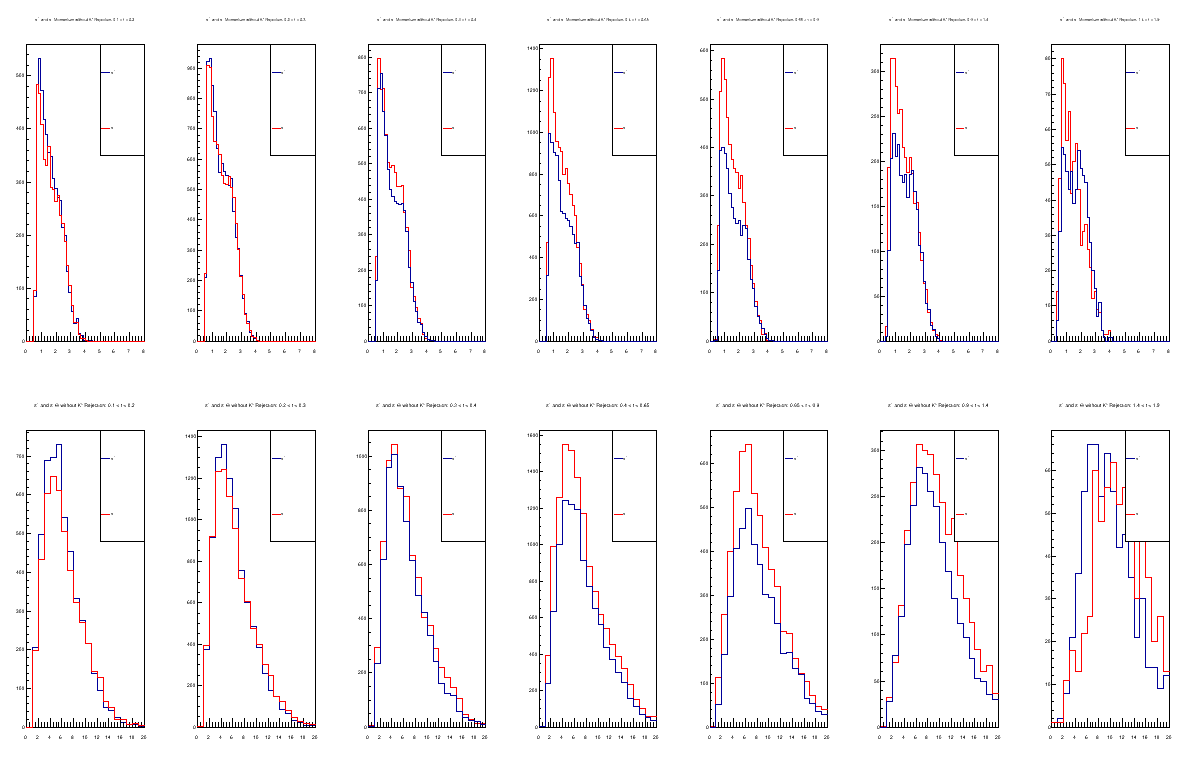

In [35]:
c.Clear()
c.Divide(7, 2)
legends = []
for i, (hist_pip1_p, hist_pim1_p, hist_pip1_theta, hist_pim1_theta) in enumerate(zip(pip1_p_hists, pim1_p_hists, pip1_theta_hists, pim1_theta_hists)):
    t_range_string = f'{constants.T_CUT_DICT[i+1][0]} < t < {constants.T_CUT_DICT[i+1][1]}'
    c.cd(i+1)
    hist_pim1_p.SetLineColor(ROOT.kRed)
    legend_pion_p = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
    legend_pion_p.AddEntry(hist_pip1_p.GetPtr(), '#pi^{+}', 'l')
    legend_pion_p.AddEntry(hist_pim1_p.GetPtr(), '#pi^{-}', 'l')
    legends.append(legend_pion_p)
    sorted_hists = tools.sort_hists_by_max([hist_pip1_p, hist_pim1_p])
    sorted_hists[0].SetTitle('#pi^{+} and #pi^{-} Momentum without K* Rejection: ' + t_range_string)
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    legends[i].Draw()
    c.cd(i+8)
    hist_pim1_theta.SetLineColor(ROOT.kRed)
    sorted_hists = tools.sort_hists_by_max([hist_pip1_theta, hist_pim1_theta])
    sorted_hists[0].SetTitle('#pi^{+} and #pi^{-} #Theta without K* Rejection: ' + t_range_string)
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    legends[i].Draw()
c.Draw()
    

#### $\Theta$ vs Momentum Distributions
**$K^{-}$ in top row, $K^{+}$** in bottom row

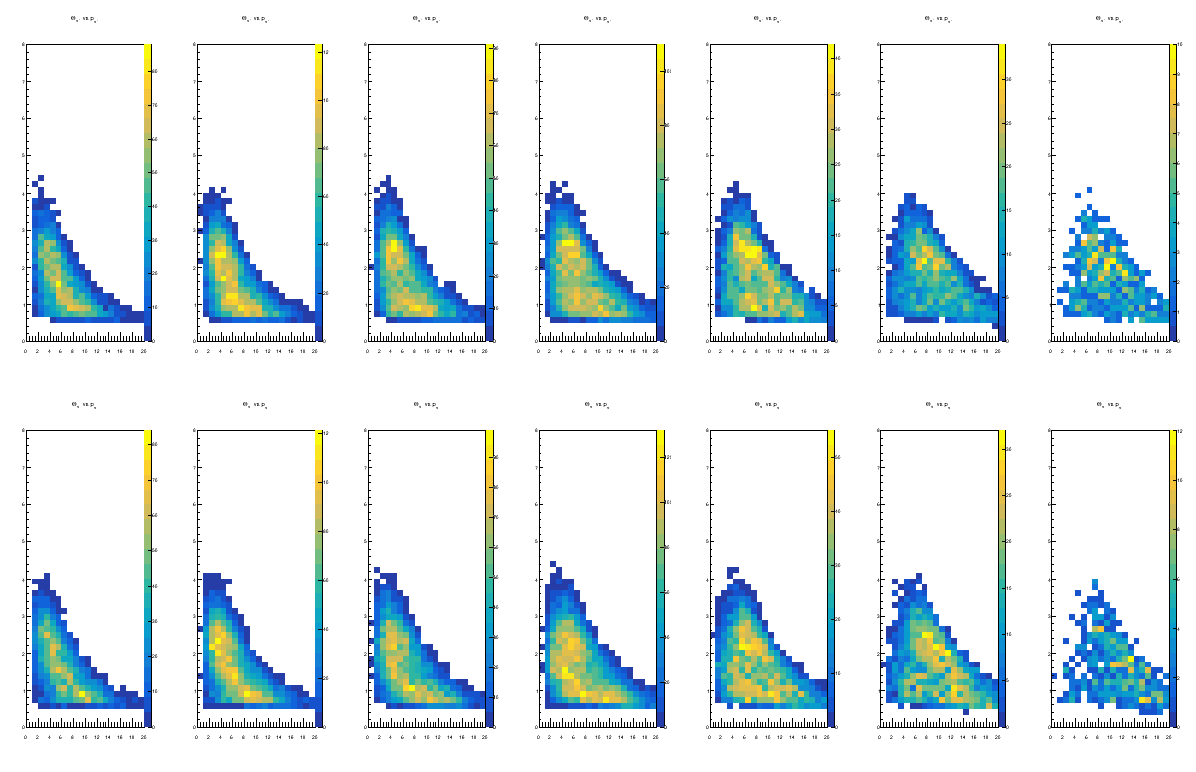

In [36]:
c.Clear()
c.Divide(7, 2)

for i, (hist_pip1, hist_pim1) in enumerate(zip(pip1_theta_vs_p_hists, pim1_theta_vs_p_hists)):
    c.cd(i+1)
    hist_pip1.Draw('colz')
    c.cd(i+8)
    hist_pim1.Draw('colz')
c.Draw()

#### Momentum vs $M(KK\pi)$ Distributions
**$K^{-}$ in top row, $K^{+}$** in bottom row

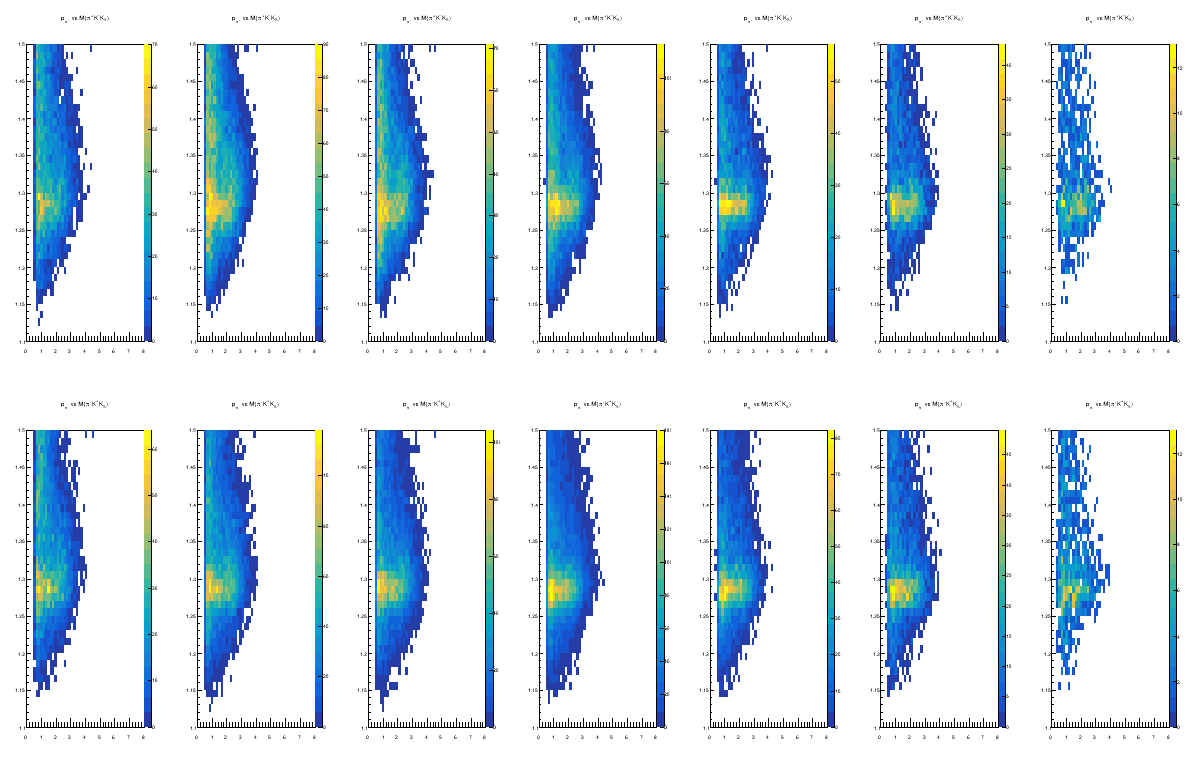

In [37]:
c.Clear()
c.Divide(7, 2)

for i, (hist_pip1, hist_pim1) in enumerate(zip(pip1_p_vs_pipkmks_hists, pim1_p_vs_pimkpks_hists)):
    c.cd(i+1)
    hist_pip1.Draw('colz')
    c.cd(i+8)
    hist_pim1.Draw('colz')
c.Draw()

#### $\Theta$ vs $M(KK\pi)$ Distributions
**$K^{-}$ in top row, $K^{+}$** in bottom row

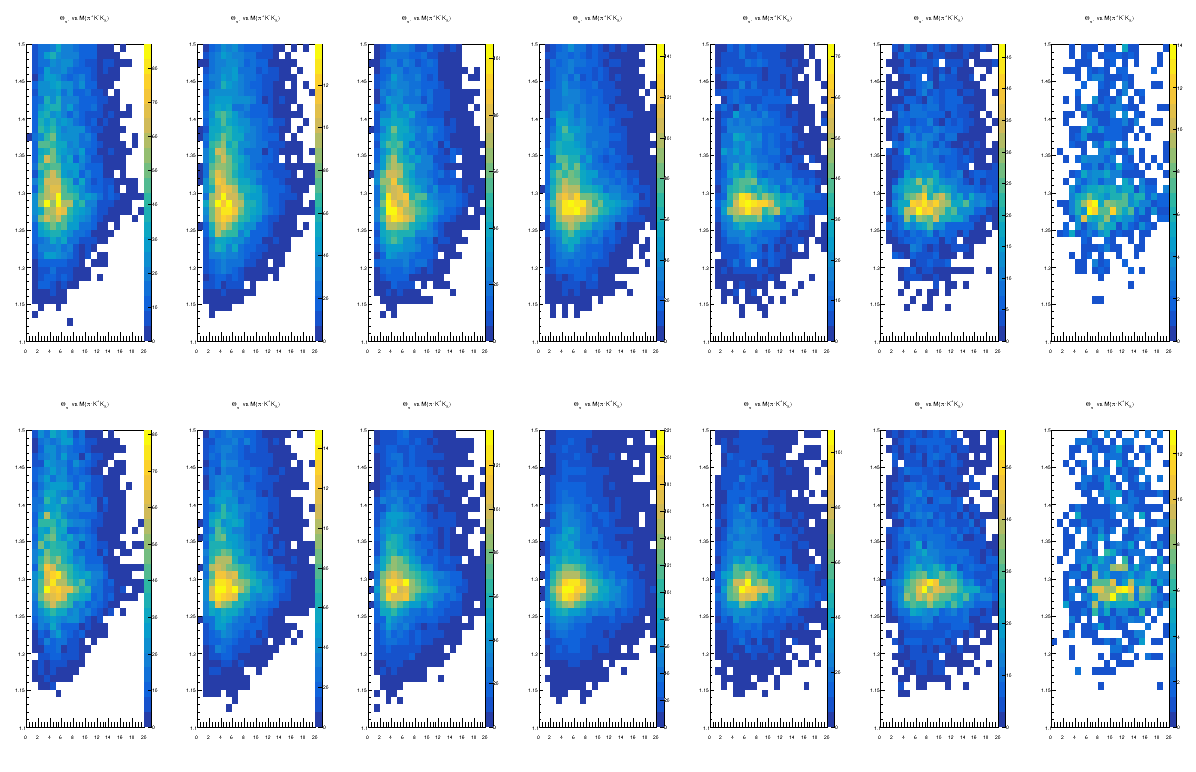

In [38]:
c.Clear()
c.Divide(7, 2)

for i, (hist_pip1, hist_pim1) in enumerate(zip(pip1_theta_vs_pipkmks_hists, pim1_theta_vs_pimkpks_hists)):
    c.cd(i+1)
    hist_pip1.Draw('colz')
    c.cd(i+8)
    hist_pim1.Draw('colz')
c.Draw()

In [ ]:
# TODO: Kshort Kinematics